# Ch04. Numpy기본: 배열과 벡터연산

In [1]:
#배열처리 속도비교
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

%time for _ in range(10):my_arr2 = my_arr *2

%time for _ in range(10):my_list2 = [x*2 for x in my_list ]

Wall time: 23.3 ms
Wall time: 1.85 s


In [2]:
[1,2,3] *2

[1, 2, 3, 1, 2, 3]

## 4.1 Numpy ndarray : 다차원 배열객체

In [3]:
import numpy as np
data = np.random.randn(2,3)
data

array([[ 0.26323584, -0.68892401,  0.42276259],
       [ 1.43369721,  0.17378112,  0.41199071]])

In [4]:
data * 10

array([[ 2.63235842, -6.88924008,  4.22762592],
       [14.33697214,  1.73781115,  4.11990713]])

In [5]:
data + data

array([[ 0.52647168, -1.37784802,  0.84552518],
       [ 2.86739443,  0.34756223,  0.82398143]])

ndarray에 저장된 데이터는 모두 같은 타입이어야햠

In [6]:
data.shape
data.dtype

(2, 3)

dtype('float64')

### 4.1.1 ndarray 생성하기

In [7]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

data2 = [[1,2,3,4],
        [5,6,7,8]]
arr2 = np.array(data2)
arr2

array([6. , 7.5, 8. , 0. , 1. ])

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [8]:
arr2.ndim
arr2.shape

#명시적으로 알려주지 않으면 적절한 데이터 타입을 추론함
arr1.dtype
arr2.dtype

2

(2, 4)

dtype('float64')

dtype('int32')

**새 배열 생성**

In [9]:
np.zeros((10,10),dtype = np.int32)
np.ones((2,3))
np.empty(10) #초기화 안된 걍 가비지값
np.arange(10)
np.full((2,3),1)
np.eye(5)
#자료형을 명시하지 않으면 float64로 대부분 나옴

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

array([[1., 1., 1.],
       [1., 1., 1.]])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([[1, 1, 1],
       [1, 1, 1]])

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [10]:
#astype 이용해서 dtype 캐스팅 가능
#!! astype은 타입이 이전과 동일해도 항상 새 배열을 생성한다.
a = np.empty((5,5),dtype = np.int32)
b = a.astype(dtype=np.float64)
a.dtype
b.dtype

dtype('int32')

dtype('float64')

**np.string 은 고정된 크기를 가지기 때문에 임의로 데이터를 자를수 있으므로 주의해야함**

In [11]:
#다른 배열의 타입 가져올수도 있음
a = np.array([1,2,3],dtype=np.int32)
b = np.zeros((2,3),dtype=np.float64)
c = b.astype(a.dtype)
a
b
c

array([1, 2, 3])

array([[0., 0., 0.],
       [0., 0., 0.]])

array([[0, 0, 0],
       [0, 0, 0]])

In [12]:
#축약코드를 사용할수도 있음
empty_uint32 = np.empty(8,dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

### 4.1.3 Numpy배열의 산술연산  
- for 문을 안쓰고도 데이터를 일괄처리할수 있음 (벡터화)  


### 4.1.4 색인과 슬라이싱 기초  
- 리스트와 비슷하지만 차이점은 슬라이싱 한 결과가 원본의 뷰라는 점임

In [13]:
arr = np.arange(10)
arr_slice = arr[5:]
arr_slice
arr_slice[0] = 20
arr_slice
arr


a = list(range(10))
a_slice = a[5:]
a_slice[0] = 20
a_slice
a

array([5, 6, 7, 8, 9])

array([20,  6,  7,  8,  9])

array([ 0,  1,  2,  3,  4, 20,  6,  7,  8,  9])

[20, 6, 7, 8, 9]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
arr = np.arange(10)
arr_slice = arr[5:]
arr_slice[:]=20
arr

array([ 0,  1,  2,  3,  4, 20, 20, 20, 20, 20])

- 위처럼 데이터 복사가 안일어나기때문에 고용량 데이터에서 유리한 면이있음  
- 복사를 하고싶다면 .copy()를 해서 명시적으로 복사해야함

- 다차원 배열에서 마지막 색인을 생략시 한차원 낮은 ndarray가됨

In [15]:
arr3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
arr3d

arr3d[0]

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

array([[1, 2, 3],
       [4, 5, 6]])

In [16]:
old_values = arr3d[0].copy()

arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [17]:
arr3d[0] = old_values
arr3d
"""
조각난 arr에도 스칼라, 배열 모두 대입가능
"""

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

'\n조각난 arr에도 스칼라, 배열 모두 대입가능\n'

### 4.1.5 불리언 값으로 선택하기

In [18]:
names=  np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
data = np.random.randn(7,4)
names
data

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

array([[ 4.22385185e-01, -8.56777461e-01,  1.33600382e+00,
        -6.49172751e-01],
       [ 9.88750155e-01,  1.74624256e+00,  5.97572444e-01,
        -8.05955197e-01],
       [ 1.18537008e+00, -1.55599215e+00, -2.40966646e-01,
         1.70959382e-02],
       [ 5.79781511e-01,  1.56863017e-03, -2.94976307e-01,
        -1.97531663e+00],
       [ 1.20888612e-02,  1.12221431e+00, -5.11251650e-01,
         3.17740769e-02],
       [ 5.05332113e-01, -1.76795724e+00,  8.47272291e-04,
         6.53973741e-01],
       [ 1.16926245e-01, -1.45220667e+00,  1.36337185e+00,
         4.82299615e-01]])

In [19]:
a = (names == 'Bob')
a

array([ True, False, False,  True, False, False, False])

In [20]:
data[names=='Bob']

array([[ 4.22385185e-01, -8.56777461e-01,  1.33600382e+00,
        -6.49172751e-01],
       [ 5.79781511e-01,  1.56863017e-03, -2.94976307e-01,
        -1.97531663e+00]])

In [21]:
data[names=='Bob',2:]

array([[ 1.33600382, -0.64917275],
       [-0.29497631, -1.97531663]])

In [22]:
data[names=='Bob',3]

array([-0.64917275, -1.97531663])

In [23]:
#Bob이 아닌놈
names!='Bob'

data[names!='Bob']
data[~(names=='Bob')]

array([False,  True,  True, False,  True,  True,  True])

array([[ 9.88750155e-01,  1.74624256e+00,  5.97572444e-01,
        -8.05955197e-01],
       [ 1.18537008e+00, -1.55599215e+00, -2.40966646e-01,
         1.70959382e-02],
       [ 1.20888612e-02,  1.12221431e+00, -5.11251650e-01,
         3.17740769e-02],
       [ 5.05332113e-01, -1.76795724e+00,  8.47272291e-04,
         6.53973741e-01],
       [ 1.16926245e-01, -1.45220667e+00,  1.36337185e+00,
         4.82299615e-01]])

array([[ 9.88750155e-01,  1.74624256e+00,  5.97572444e-01,
        -8.05955197e-01],
       [ 1.18537008e+00, -1.55599215e+00, -2.40966646e-01,
         1.70959382e-02],
       [ 1.20888612e-02,  1.12221431e+00, -5.11251650e-01,
         3.17740769e-02],
       [ 5.05332113e-01, -1.76795724e+00,  8.47272291e-04,
         6.53973741e-01],
       [ 1.16926245e-01, -1.45220667e+00,  1.36337185e+00,
         4.82299615e-01]])

In [24]:
#두가지 이름 선택 or, and
mask = (names == 'Bob')|(names=='Will')
data[mask]

array([[ 4.22385185e-01, -8.56777461e-01,  1.33600382e+00,
        -6.49172751e-01],
       [ 1.18537008e+00, -1.55599215e+00, -2.40966646e-01,
         1.70959382e-02],
       [ 5.79781511e-01,  1.56863017e-03, -2.94976307e-01,
        -1.97531663e+00],
       [ 1.20888612e-02,  1.12221431e+00, -5.11251650e-01,
         3.17740769e-02]])

**불리언 배열을 이용해서 선택하면 데이터 복사가 일어남??**

### 4.1.6 팬시 색인  
- 정수 배열을 이용한 색인

In [25]:
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [26]:
#특정한 로우 선택하려면 걍 원하는 숫자가 담긴 ndarray나 list 넘기면됨
arr[[3,4,5]]
arr[[-1,-2,-1]]

array([[3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.]])

array([[7., 7., 7., 7.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [27]:
#다차원 배열을 넘기면 각각의 색인 튜플에 대응하는 1차원 배열이 선택됨
arr[[1,2,3],[1,2,3]]

array([1., 2., 3.])

In [28]:
#만약 2차원으로 선택하려면..
arr[[1,2,3]][:,[1,2,3]]

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.]])

### 4.1.7 배열 전치와 축 바꾸기  
- 데이터를 복사하지 않고 모양이 바뀐 뷰를 제공

In [29]:
arr = np.arange(15).reshape((3,5))
arr
arr.shape

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

(3, 5)

In [30]:
arr.T
arr.T.shape

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

(5, 3)

## 4.2 유니버셜 함수 : 배열의 각 원소를 빠르게 처리하는 함수  
 - 하나이상의 스칼라값을 받아서 하나이상의 스칼라 결과값을 반환  
 - 고속으로 처리가능

In [31]:
arr = np.arange(10)
arr

np.sqrt(arr)
np.exp(arr) #단항 유니버셜함수

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [32]:
#이항 유니버셜 함수
x = np.random.randn(8)
y = np.random.randn(8)
x
y

np.maximum(x,y)

array([-0.79610798,  0.70695943, -0.69983435, -2.26576279,  1.1627071 ,
       -0.76975944, -0.73342262, -0.52787876])

array([ 0.02918285,  0.14045119, -2.18240357, -0.44768482, -0.85440296,
       -0.33412496,  0.09384972, -0.72110884])

array([ 0.02918285,  0.70695943, -0.69983435, -0.44768482,  1.1627071 ,
       -0.33412496,  0.09384972, -0.52787876])

In [33]:
#여러개의 배열을 반환하는 유니버셜
arr = np.random.randn(7) *5
arr
remainde,whole_part = np.modf(arr)
remainde
whole_part


array([ 9.00516588, -9.95193558, -0.15260556,  7.77281666, -3.26864447,
       -3.18371878,  1.09178825])

array([ 0.00516588, -0.95193558, -0.15260556,  0.77281666, -0.26864447,
       -0.18371878,  0.09178825])

array([ 9., -9., -0.,  7., -3., -3.,  1.])

In [34]:
#out인자를 따로 추가해 값을 받을수도있음
arr
np.sqrt(arr)
np.sqrt(arr,arr)
arr

array([ 9.00516588, -9.95193558, -0.15260556,  7.77281666, -3.26864447,
       -3.18371878,  1.09178825])

C:\Users\sorkt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


array([3.00086086,        nan,        nan, 2.78797716,        nan,
              nan, 1.04488672])

C:\Users\sorkt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


array([3.00086086,        nan,        nan, 2.78797716,        nan,
              nan, 1.04488672])

array([3.00086086,        nan,        nan, 2.78797716,        nan,
              nan, 1.04488672])

## 4.3 배열을 이용한 배열지향 프로그래밍  
- 배열연산을 이용하여 반복문의 제거하면 (벡터화) 성능이 매우 상승함

In [35]:
#meshgrid 는 두개의 1차원 배열을 받아서 가능한 모든수 짝을 만들어줌, 2차원 배열 2개 반환
points = np.arange(-5,5,0.01)
xs,ys = np.meshgrid(points,points)
xs
ys

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [36]:
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, '$\\sqrt{x^2 + y^2}$')

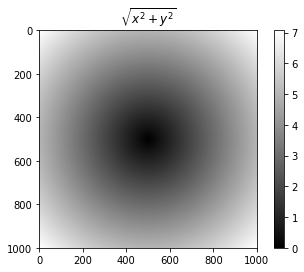

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z,cmap=plt.cm.gray)
plt.colorbar()
plt.title('$\sqrt{x^2 + y^2}$')

### 4.3.1 배열 연산으로 조건절 표현하기  
- np.where : x if 조건 else y 같은 삼항식의 베터화된 버전임

In [38]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [39]:
#cond가 True이면 x, 아니면 y를 취하고자 할때
result = [(x if c else y) for x,c,y in zip(xarr,cond,yarr)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

순수파이썬 문법이므로 큰배열일수록 성능 저하, 다차원 배열에는 사용불가

In [40]:
#np.where
result = np.where(cond,xarr,yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [41]:
#꼭 배열일 필요없음
np.where(cond,xarr,5)
np.where(cond,1,5)

array([1.1, 5. , 1.3, 1.4, 5. ])

array([1, 5, 1, 1, 5])

In [42]:
#일반적인 예시, 음수는 모두 -2로, 양수는 모두 2로
arr = np.random.randn(4,4)
arr
arr>=0
np.where(arr>=0,2,-2)
np.where(arr>=0,2,arr)#스칼라, 배열 조합해서 양수만 바꿀수도 있음

array([[-2.08095913,  0.51689244,  1.15173545, -2.58339147],
       [-1.16215477, -0.19156403, -0.61663231, -1.23468285],
       [-1.28305398, -0.61248706, -0.3016271 ,  0.41050963],
       [ 1.95817758,  2.16199438, -0.27337187, -0.17466548]])

array([[False,  True,  True, False],
       [False, False, False, False],
       [False, False, False,  True],
       [ True,  True, False, False]])

array([[-2,  2,  2, -2],
       [-2, -2, -2, -2],
       [-2, -2, -2,  2],
       [ 2,  2, -2, -2]])

array([[-2.08095913,  2.        ,  2.        , -2.58339147],
       [-1.16215477, -0.19156403, -0.61663231, -1.23468285],
       [-1.28305398, -0.61248706, -0.3016271 ,  2.        ],
       [ 2.        ,  2.        , -0.27337187, -0.17466548]])

### 4.3.2 수학 메서드와 통계 메서드

In [43]:
arr = np.random.randn(5,4)
arr
arr.mean()
np.mean(arr)
np.sum(arr)

array([[ 0.64990008,  0.81719103,  0.50517596,  1.09631227],
       [ 1.102799  ,  0.14464432,  0.7415408 ,  0.64154468],
       [-0.20774433,  0.67038502, -0.3782867 , -0.10457748],
       [ 0.72727699, -0.80078725,  0.83252587, -0.44495341],
       [-0.60077121, -1.28312221,  1.61849444, -1.14944443]])

0.22890517188734294

0.22890517188734294

4.578103437746859

In [44]:
#axis 받아서 해당 축에 해당하는 값만 계산가능
np.mean(arr,axis=0)
arr.sum(axis=1)
arr.sum(1)

array([ 0.3342921 , -0.09033782,  0.66389007,  0.00777633])

array([ 3.06857933,  2.6305288 , -0.02022349,  0.3140622 , -1.41484341])

array([ 3.06857933,  2.6305288 , -0.02022349,  0.3140622 , -1.41484341])

In [45]:
#cumsum
arr.cumsum(0)
arr.cumprod(0)

array([[ 0.64990008,  0.81719103,  0.50517596,  1.09631227],
       [ 1.75269907,  0.96183534,  1.24671676,  1.73785695],
       [ 1.54495474,  1.63222037,  0.86843006,  1.63327947],
       [ 2.27223173,  0.83143312,  1.70095593,  1.18832606],
       [ 1.67146052, -0.45168909,  3.31945037,  0.03888164]])

array([[ 0.64990008,  0.81719103,  0.50517596,  1.09631227],
       [ 0.71670915,  0.11820204,  0.37460859,  0.7033333 ],
       [-0.14889226,  0.07924088, -0.14170945, -0.07355282],
       [-0.10828592, -0.06345508, -0.11797678,  0.03272758],
       [ 0.06505506,  0.08142063, -0.19094476, -0.03761853]])

In [46]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
arr
arr.cumsum(axis=0)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

### 4.3.3 불리언 배열을 위한 메서드

In [47]:
arr = np.random.randn(100)
(arr>0)
(arr>0).sum() #요러면 True인 원소수를 알수있음

array([False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False,  True,  True, False,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True, False,  True,  True, False,  True, False,
        True, False, False, False, False, False,  True, False,  True,
        True])

47

In [48]:
#all과 any
bools = np.array([False,False,True,False])
bools.any()
bools.all()

True

False

### 4.3.4 정렬

In [49]:
arr = np.random.randn(6)
arr
arr.sort()
arr

array([ 0.01480229, -1.8642941 , -0.86564701, -0.68961702, -1.02507595,
       -0.12000189])

array([-1.8642941 , -1.02507595, -0.86564701, -0.68961702, -0.12000189,
        0.01480229])

In [50]:
#다차원의 경우 넘긴 축의 값에 따라 정렬함
arr = np.random.randn(5,3)
arr
arr.sort(axis=0)
arr

array([[ 0.15019443, -2.38873738,  0.32365271],
       [-1.32534722,  0.15218711, -2.40766965],
       [-0.29083241,  0.94509613,  0.29149998],
       [-1.7043503 ,  1.60429167, -0.27416362],
       [-0.95960886, -1.69904872, -1.32128658]])

array([[-1.7043503 , -2.38873738, -2.40766965],
       [-1.32534722, -1.69904872, -1.32128658],
       [-0.95960886,  0.15218711, -0.27416362],
       [-0.29083241,  0.94509613,  0.29149998],
       [ 0.15019443,  1.60429167,  0.32365271]])

In [51]:
#np.sort()를하면 직접변경하지 않고 변경된 배열 반환
arr = np.random.randn(5,3)
np.sort(arr,axis=0)

array([[-1.99040312, -0.02292637, -3.01271948],
       [-0.39192896,  0.23186678, -0.64438793],
       [-0.06394616,  0.32384802, -0.61838724],
       [ 0.24213423,  0.54368485, -0.56480408],
       [ 1.84274643,  0.8404263 ,  0.28972146]])

In [52]:
#배열의 분위수를 구하기 위해서는 일단 정렬하고 특정분위의 값을 선택하면 된다.
large = np.random.randn(1000)
large.sort()
large[int(0.05 * len(large))]

-1.5971143055346677

### 4.3.5 집합관련 함수

In [53]:
#유일한 값 얻기
names = np.array(['Bob','Joe','Will','Adam','Bob','Will','Joe','Joe'])
np.unique(names)
print("""
정렬도 해줌""")

array(['Adam', 'Bob', 'Joe', 'Will'], dtype='<U4')


정렬도 해줌


In [54]:
#파이썬만으로 등가 구현하면
sorted(set(names))

['Adam', 'Bob', 'Joe', 'Will']

In [55]:
#np.in1d : 두개의 배열을 받아 첫번째 배열의 각원소가 두번째에 들어가있는지 확인
values = np.array([6,0,0,3,2,5,6])
np.in1d(values,[6,3])

array([ True, False, False,  True, False, False,  True])

## 4.4 배열 데이터의 파일 입출력  
- 디스크에서 텍스트나 바이너리형식의 데이터를 불러오거나 저장가능

In [56]:
arr = np.arange(10)
#np.save('some_array',arr)
np.save('some_array.npy',arr)

In [57]:
arr2 = np.load('some_array.npy')
arr2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
#np.savez 함수는 여러개의 배열을 압축형태로 저장가능하는데, 배열을 키워드 인자 형태로 전달함]
arr1 = np.arange(10)
arr2 = np.arange(5,15,1)
np.savez('zipArr.npz',a = arr1,b=arr2) #확장자명이 npz인것에 유의

In [59]:
arrs = np.load('zipArr.npz')
arrs

In [60]:
arrs['a']
arrs['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [61]:
#압축이 잘되는 형식이라면 .savez_compressed 사용
np.savez_compressed('CompArr.npz',a=arr1,b=arr2)

## 4.5 선형대수

In [62]:
x = np.array([[1., 2., 3.],[4, 5, 6]])
y = np.array([[6., 23],[-1,7],[8,9]])
x
y
x.dot(y)
#파이썬 3.5 이상부터는 @기호를 써서 행렬곱 가능
x@y

array([[1., 2., 3.],
       [4., 5., 6.]])

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

array([[ 28.,  64.],
       [ 67., 181.]])

array([[ 28.,  64.],
       [ 67., 181.]])

- **numpy.linalg**는 선대 알고리듬 포함  
매틀랩,R같은 표준 포트랑 라이브러리 이용해서 구현됨

In [63]:
from numpy.linalg import inv,qr
#np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.2f}".format(x)})
x = np.random.randn(5,5)*1000
x
x.T
mat = x.T.dot(x)
mat
inv(mat)
mat.dot(inv(mat))


array([[50.11, -827.72, 802.25, -1283.62, 1626.69],
       [296.13, -58.16, -120.61, 1773.74, 31.54],
       [277.46, -508.75, 863.41, -1657.86, 1987.91],
       [-74.66, -21.85, 593.70, -1315.36, 145.02],
       [-462.55, 1430.68, 2405.78, 45.29, -737.86]])

array([[50.11, 296.13, 277.46, -74.66, -462.55],
       [-827.72, -58.16, -508.75, -21.85, 1430.68],
       [802.25, -120.61, 863.41, 593.70, 2405.78],
       [-1283.62, 1773.74, -1657.86, -1315.36, 45.29],
       [1626.69, 31.54, 1987.91, 145.02, -737.86]])

array([[386715.29, -859995.55, -913071.27, 78192.54, 972894.67],
       [-859995.55, 2994661.58, 2332646.29, 1896297.43, -3418438.47],
       [-913071.27, 2332646.29, 7543869.32, -3347086.04, 1328554.69],
       [78192.54, 1896297.43, -3347086.04, 9274565.74, -5551947.61],
       [972894.67, -3418438.47, 1328554.69, -5551947.61, 7164340.88]])

array([[0.00, -0.00, 0.00, -0.00, -0.00],
       [-0.00, 0.00, -0.00, 0.00, 0.00],
       [0.00, -0.00, 0.00, -0.00, -0.00],
       [-0.00, 0.00, -0.00, 0.00, 0.00],
       [-0.00, 0.00, -0.00, 0.00, 0.00]])

array([[1.00, -0.00, -0.00, 0.00, -0.00],
       [0.00, 1.00, 0.00, -0.00, -0.00],
       [0.00, 0.00, 1.00, 0.00, 0.00],
       [-0.00, 0.00, -0.00, 1.00, 0.00],
       [0.00, -0.00, 0.00, -0.00, 1.00]])

## 4.6 난수 생성  
파이썬 내장 random 함수는 한번에 하나의 값을 얻어낼수 있는데 반해 np.random은 훨씬빠름  
유사난수 (seed) 사용

In [64]:
from random import normalvariate

N = 100000

%timeit samples = [normalvariate(1,0) for _ in range(N)]

%timeit samples = np.random.normal(N)

220 ms ± 17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.41 µs ± 62.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [65]:
#시드값을 지정가능
np.random.seed(1234)

#np.random.RandomState()??? 다른 시드로부터 격리된 생성기를 만들수 있음??
rng = np.random.RandomState(1234)
rng
for _ in range(10):
    rng.randn(10)

array([0.47, -1.19, 1.43, -0.31, -0.72, 0.89, 0.86, -0.64, 0.02, -2.24])

array([1.15, 0.99, 0.95, -2.02, -0.33, 0.00, 0.41, 0.29, 1.32, -1.55])

array([-0.20, -0.66, 0.19, 0.55, 1.32, -0.47, 0.68, -1.82, -0.18, 1.06])

array([-0.40, 0.34, 1.05, 1.05, 0.86, -0.12, 0.12, -0.32, 0.84, 2.39])

array([0.08, -0.57, 0.04, -2.07, 0.25, -0.90, -0.14, 0.02, 0.76, 0.22])

array([0.84, -1.45, -1.40, -0.10, -0.55, -0.14, 0.35, -0.04, 0.57, 1.55])

array([-0.97, -0.07, 0.31, -0.21, 1.03, -2.40, 2.03, -1.14, 0.21, 0.70])

array([-0.79, 0.46, 0.70, 0.52, -0.93, 2.01, 0.23, -1.15, 0.63, 0.04])

array([0.46, -3.56, 1.32, 0.15, 0.16, -0.43, 0.77, 0.98, 0.27, 1.39])

array([0.08, -0.40, -1.03, -0.58, 0.82, -0.08, -0.34, 0.53, -1.07, -0.51])

## 4.7 계단 오르내리기 예제

- 한계단 오르거나 내리는 코드를  1000번 구현

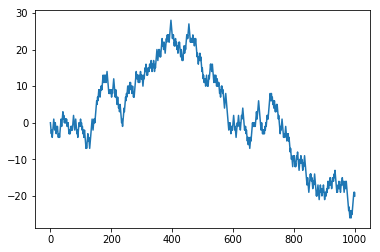

In [66]:
#파이썬 내장 모듈의 경우
import random
import matplotlib.pyplot as plt

position = 0
walk = [position]
steps = 1000

for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)
plt.plot(walk)

- 결과는 올라가거나 내려가거나 +1, -1 의 누적합임 -> np.random 이용

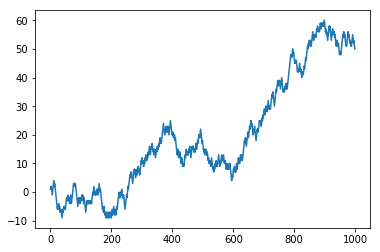

In [67]:
draw = np.random.randint(0,2,size = steps)
stepb = np.where(draw>0,1,-1)
walk = stepb.cumsum()
plt.plot(walk)

In [68]:
# 계단을 오르내린 최대 위치 등을 뽑아내기 편함
walk.min()
walk.max()
walk.mean()

-9

60

19.504

- 조금더 복잡한 통계  
처음으로 10칸 이상 떨어지는데 얼마나 걸렸는지

In [69]:
(np.abs(walk) >= 10).argmax()

#argmax를 이용했지만 모든 엔트리를 다 확인하기 때문에 효율적이지는 않음
# 또 True가 Max라는걸 미리 알고 있었음

297

### 4.7.1 한번에 시뮬레이션 하기

In [70]:
testnum = 5000
stepsize = 1000
draws = np.random.randint(0,2,(testnum,stepsize))
steps = np.where(draws>0,1,-1)
walks = steps.cumsum(axis = 1)
walks.shape

#모든 케이스의 최대,최소값
walks.max()
walks.min()

#누적합이 30이 되는 최소시점
#30 아예안되는 놈이 있는데 이런걸 거르기위해 any 사용
a = (np.abs(walks) >= 30)
hit30 = a.any(axis=1)
hit30.sum()
hit30.shape
#hit30 - 30이상이 포함된 배열 엔트리

crossing_times = (np.abs(walks[hit30]) >= 30).argmax(axis=1)
crossing_times
crossing_times.mean()

(5000, 1000)

122

-128

3368

(5000,)

array([133, 395, 343, ..., 409, 297, 747], dtype=int64)

509.99762470308787

(array([2.00, 14.00, 47.00, 83.00, 105.00, 118.00, 80.00, 38.00, 10.00,
        3.00]),
 array([-9.98, -6.92, -3.85, -0.79, 2.27, 5.34, 8.40, 11.46, 14.53, 17.59,
        20.65]),
 <a list of 10 Patch objects>)

(-100, 100)

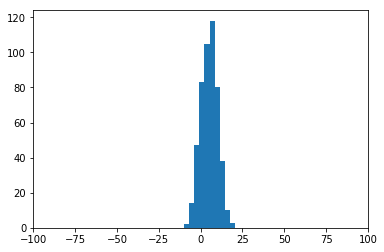

In [71]:
a = np.random.normal(loc = 5,scale = 5,size = 500)
plt.hist(a)
plt.xlim([-100,100])